In [11]:
from HMM import load_HMM
from dictionaries import id_to_word, rhyming_dictionary, word_to_id, syllable_dictionary
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation

In [12]:


# helpers
def prefix_word(word):
    if word in syllable_dictionary:
        counts = syllable_dictionary[word]
    else:
        for punct in [",", ".", "!", "?", ":", "'", ";", "(", ")", "[", "]", "{", "}"]:
            word = word.replace(punct, "")
            if word in syllable_dictionary:
                break
        counts = syllable_dictionary[word]

    end_counts = [c for c in counts if c[0] == "E"]
    count = end_counts[0] if len(end_counts) > 0 else counts[0]

    stress = "/"
    prefix = ""
    for _ in range(int(count.replace("E", ""))):
        prefix = stress + prefix
        stress = "/" if stress == "$" else "$"

    return prefix + word


def print_emission(emission, remove_special=False):
    if remove_special:
        print(
            " ".join(
                [id_to_word[id].replace("$", "").replace("/", "") for id in emission]
            )
        )
    else:
        print(" ".join([id_to_word[id] for id in emission]))


def invert_words(words):
    return [
        word_to_id[prefix_word(word)]
        for word in words
        if prefix_word(word) in word_to_id
    ]

In [30]:
####################
# WORDCLOUD FUNCTIONS
####################


def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r : d - r, -r : d - r]
    circle = x**2 + y**2 <= r**2

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask


def text_to_wordcloud(text, max_words=50, title="", show=True):
    plt.close("all")

    # Generate a wordcloud image.
    wordcloud = WordCloud(
        random_state=0,
        regexp=r"\S+",
        max_words=max_words,
        background_color="white",
        mask=mask(),
    ).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud


def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = id_to_word
    wordclouds = []

    # Generate a large emission.
    emission = []
    states = []
    for _ in range(1000):
        e, s = hmm.generate_emission(10, end_words=invert_words(rhyming_dictionary.keys()))
        emission += e
        states += s
    print(emission)
    print(states)
    print(n_states)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    print(obs_count)
    print(obs_lst)
    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = " ".join(sentence)

        wordclouds.append(
            text_to_wordcloud(
                sentence_str, max_words=max_words, title="State %d" % i, show=show
            )
        )

    return wordclouds

In [14]:
####################
# HMM VISUALIZATION FUNCTIONS
####################

def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()


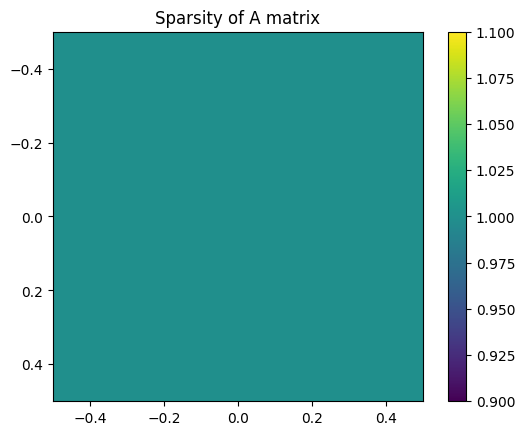

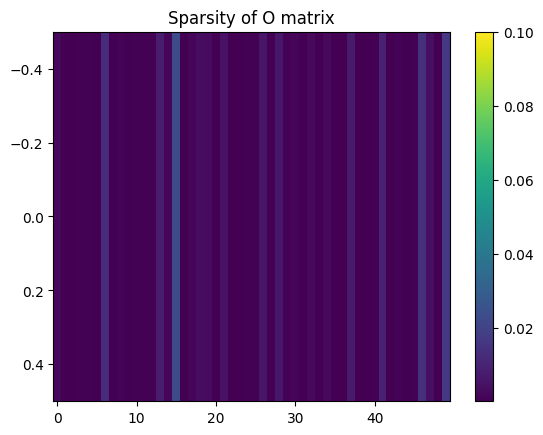

In [15]:
visualize_sparsities(load_HMM("models/hmm-1-1.txt"))

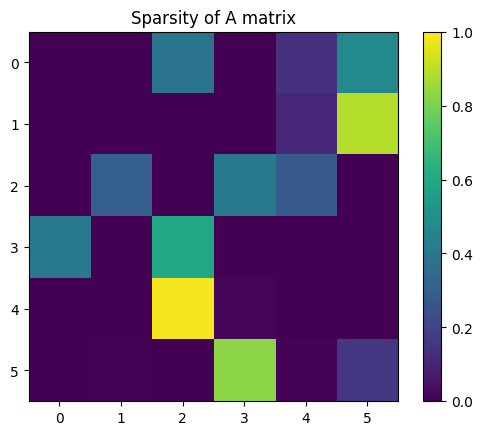

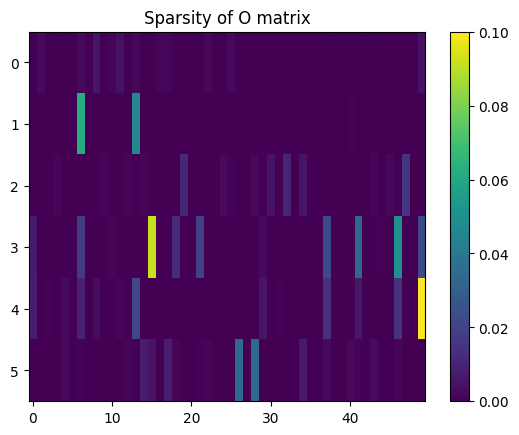

In [16]:
hmm_6_100 = load_HMM("models/hmm-6-100.txt")
visualize_sparsities(hmm_6_100)

In [17]:
text = ""
for _ in range(1000):
    emission, _ = hmm_6_100.generate_emission(10, end_words=invert_words(rhyming_dictionary.keys()))
    text += " ".join([id_to_word[id] for id in emission])
text



"$to /breast $nor $make /my $/detain /$withering /strange$but /me $the /hide $when /of $till /$gentle /dream/$nature's /leave $the $nor /to $the /$/expiate/off $so $/into $old /$thousand $do $/away$shall /love $ay /$forged $was /pale /one $their /yore/then /of $/despise /moan $doth /praised /$/poverty$/against $i /$water /thou $to /$forfeit /fee/brag $they /$manners $/present'st $of /foes $will /bent/of /with /$sickle's /try $that $/$/determinate$you /$mortal /sing $from /self /seek /thence $the /speak$might /i /$present /$frequent $/$/society/good $look /for /mine $in /$/parallels $robbed /gone/reign /thee $my /stone $to /hour $with $me $will /do/eyed /brow $but /in $/$entombed /fear $thou /hate/mine $my $if /snow $be /east $/$/accumulate$with /soon $that $i /hide $how /truth $/proclaims /moan/or /long /with $in $o /day $/within /place /young$/forbid $a /$antique /checked $/perfumed $/define/dwells $i /$/injuries /$darkly /rich $and /may/work's $in /ill $with $rain /thou $not /$spirit

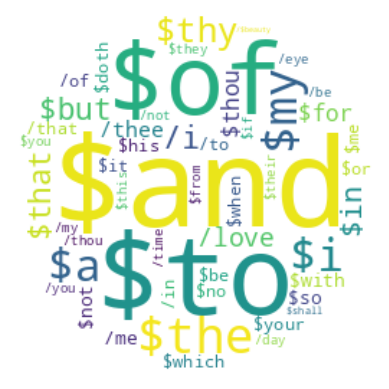

In [18]:
text_to_wordcloud(text)

In [31]:
states_to_wordclouds(hmm_6_100, word_to_id, max_words=100, show=True)

[10, 1889, 810, 32, 15, 2173, 2888, 14, 15, 492, 254, 1239, 15, 2876, 386, 15, 1329, 80, 2476, 2318, 562, 2765, 1799, 3199, 1309, 100, 2844, 49, 54, 656, 3714, 60, 674, 1672, 2541, 3246, 103, 1016, 106, 368, 8, 1449, 1515, 1940, 54, 580, 969, 287, 2355, 814, 222, 660, 0, 3459, 553, 85, 49, 2473, 1936, 2237, 916, 37, 518, 170, 2199, 3004, 14, 72, 868, 1404, 798, 353, 2782, 992, 2625, 37, 2000, 2182, 80, 325, 669, 80, 158, 550, 46, 80, 46, 1904, 252, 1990, 28, 6, 1692, 106, 947, 6, 624, 772, 100, 3358, 2105, 450, 3456, 487, 60, 1947, 312, 142, 556, 3293, 361, 1424, 516, 1066, 49, 2048, 287, 550, 967, 668, 76, 2536, 3471, 37, 989, 1751, 117, 46, 547, 0, 19, 252, 1374, 37, 153, 265, 100, 487, 41, 173, 561, 106, 1109, 26, 1373, 158, 218, 561, 798, 1156, 41, 1267, 13, 120, 1435, 331, 110, 89, 21, 2540, 283, 60, 49, 342, 106, 350, 3070, 37, 2440, 642, 423, 142, 1196, 6, 359, 266, 119, 53, 3142, 102, 1799, 504, 2318, 2716, 2086, 301, 46, 119, 2289, 1163, 1436, 1727, 95, 2014, 1174, 1171, 224, 